In [1]:
import pandas as pd
import os
cur_dir = os.getcwd()
cur_dir

'c:\\Users\\GR\\Downloads\\VS_clostridium 2\\VS_clostridium 2\\lib'

In [2]:
raw_data = pd.read_csv(f'{cur_dir}\\data\\syngas_fermentation_data.csv')
raw_data = raw_data.iloc[:,:8]
raw_data.columns = ['composition','trial','time','acetate','biomass', 'butanol','butyrate','ethanol']
raw_data.set_index(['composition','trial','time'],drop=True,inplace=True)
raw_data.to_csv(f'{cur_dir}\\data\\raw_data.csv')
raw_data.head()


acetate  biomass  butanol  butyrate  ethanol
composition trial time                                              
1           1     0.00     0.23     0.01     0.00      0.06     0.00
                  0.57    10.90     0.45     0.03      0.09    12.83
                  0.67    16.43     0.44     0.03      0.13    15.61
                  0.90    17.76     0.41     0.03      0.08    17.14
                  1.58    21.61     0.41     0.04      0.06    10.94

In [ ]:
from plotting.plot_scatterplots import plot_scatterplots
plot_scatterplots(raw_data, "Raw Data")

In [3]:
from data_processing.smooth_interpolate_truncate import smooth_interpolate_truncate
smooth_data = smooth_interpolate_truncate(raw_data,0.1)
smooth_data.to_csv(f'{cur_dir}\\data\\smooth_data.csv')
smooth_data.head()



acetate   biomass   butanol  butyrate    ethanol
composition trial time                                                    
1           1     0.0   16.905029  0.429546  0.029818  0.075529  15.895240
                  0.1   18.001195  0.421076  0.028260  0.061033  15.607023
                  0.2   19.831073  0.410803  0.028316  0.051013  15.144135
                  0.3   22.196249  0.403602  0.031357  0.050367  14.522308
                  0.4   25.293925  0.403709  0.028700  0.035514  13.956015

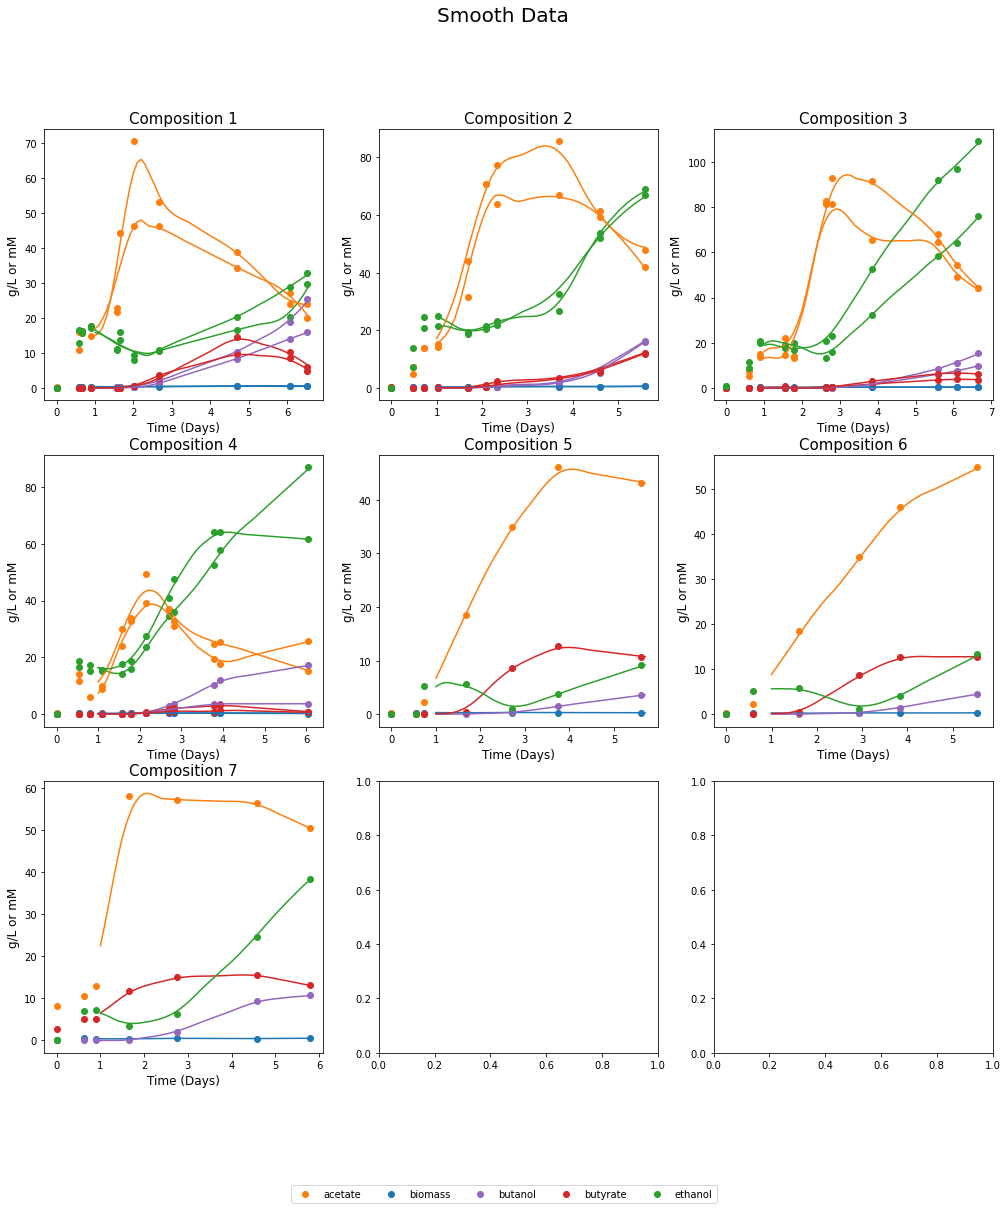

In [5]:
from plotting.plot_smooth import plot_smooth
plot_smooth(smooth_data, raw_data)

In [ ]:
# from kinetic_model.get_kinetic_parameter_dictionary import get_kinetic_parameter_dictionary
# kinetic_parameter_dict = get_kinetic_parameter_dictionary(smooth_data, 50)

In [ ]:
# for comp in range(1,8):
#     print ('composition:', (comp))
#     print(kinetic_parameter_dict[comp].params['a_ac_1'].value + kinetic_parameter_dict[comp].params['a_bm_1'].value)
#     print(kinetic_parameter_dict[comp].params['a_ac_2'].value + kinetic_parameter_dict[comp].params['a_et_2'].value
#          +kinetic_parameter_dict[comp].params['a_bt_2'].value + kinetic_parameter_dict[comp].params['a_bl_2'].value)
#     display(kinetic_parameter_dict[comp])

In [ ]:
# from kinetic_model.get_kinetic_model_data import get_kinetic_model_data

# kinetic_data = get_kinetic_model_data(smooth_data, kinetic_parameter_dict)
# kinetic_data.head()


In [ ]:
# kinetic_data.to_csv(f'{cur_dir}\\data\\kinetic_data.csv')

In [8]:
kinetic_data = pd.read_csv(f'{cur_dir}\\data\\kinetic_data.csv')
kinetic_data.set_index(['composition', 'time'],drop=True,inplace=True)
kinetic_data.head()

acetate   biomass   butanol  butyrate    ethanol
composition time                                                    
1.0         0.0   15.992719  0.409529  0.105137  0.068777  16.239544
            0.1   17.928105  0.464472  0.105137  0.068777  16.239544
            0.2   20.107580  0.526345  0.105137  0.068777  16.239544
            0.3   22.568282  0.596202  0.105137  0.068777  16.239544
            0.4   25.357486  0.675385  0.105137  0.068777  16.239544

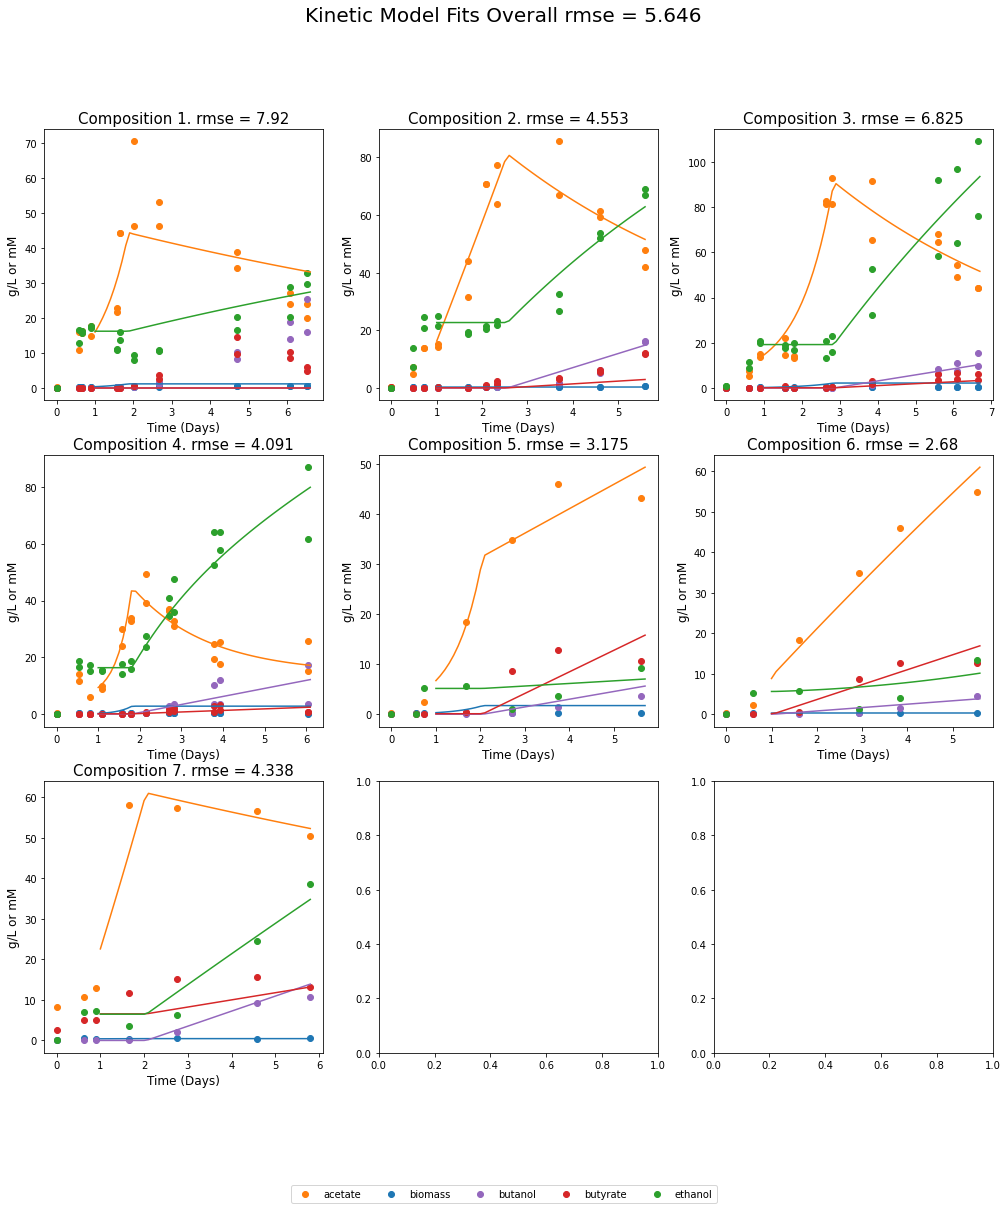

In [10]:
from plotting.plot_fit import plot_fit
plot_fit(kinetic_data, raw_data, 'Kinetic Model Fits')

In [12]:
from data_processing.calculate_slopes import calculate_slopes
raw_data_slopes = calculate_slopes(raw_data)
raw_data_slopes.to_csv(f'{cur_dir}\\data\\raw_data_slopes.csv')

smooth_data_slopes = calculate_slopes(smooth_data)
smooth_data_slopes.to_csv(f'{cur_dir}\\data\\smooth_data_slopes.csv')

kinetic_data_slopes = calculate_slopes(kinetic_data)
kinetic_data_slopes.to_csv(f'{cur_dir}\\data\\kinetic_data_slopes.csv')


In [15]:
raw_data_slopes.head()

,trial,time,acetate,biomass,butanol,butyrate,ethanol,Δ acetate,Δ biomass,Δ butanol,Δ butyrate,Δ ethanol,CO,CO2,H2,Flow Rate
1,1,0.00,0.23,0.01,0.00,0.06,0.00,18.719298,0.771930,0.052632,0.052632,22.508772,0.5,0.375,0.125,1
1,1,0.57,10.90,0.45,0.03,0.09,12.83,55.300000,-0.100000,0.000000,0.400000,27.800000,0.5,0.375,0.125,1
1,1,0.67,16.43,0.44,0.03,0.13,15.61,5.782609,-0.130435,0.000000,-0.217391,6.652174,0.5,0.375,0.125,1
1,1,0.90,17.76,0.41,0.03,0.08,17.14,5.661765,0.000000,0.014706,-0.029412,-9.117647,0.5,0.375,0.125,1
1,1,1.58,21.61,0.41,0.04,0.06,10.94,324.285714,-0.285714,0.142857,0.285714,70.714286,0.5,0.375,0.125,1


In [16]:
smooth_data_slopes.head()

,trial,time,acetate,biomass,butanol,butyrate,ethanol,Δ acetate,Δ biomass,Δ butanol,Δ butyrate,Δ ethanol,CO,CO2,H2,Flow Rate
1,1,0.0,16.905029,0.429546,0.029818,0.075529,15.895240,10.961665,-0.084697,-0.015584,-0.144950,-2.882172,0.5,0.375,0.125,1
1,1,0.1,18.001195,0.421076,0.028260,0.061033,15.607023,18.298778,-0.102733,0.000561,-0.100208,-4.628878,0.5,0.375,0.125,1
1,1,0.2,19.831073,0.410803,0.028316,0.051013,15.144135,23.651756,-0.072009,0.030416,-0.006462,-6.218271,0.5,0.375,0.125,1
1,1,0.3,22.196249,0.403602,0.031357,0.050367,14.522308,30.976760,0.001068,-0.026579,-0.148525,-5.662923,0.5,0.375,0.125,1
1,1,0.4,25.293925,0.403709,0.028700,0.035514,13.956015,37.112317,0.025050,0.023385,0.056090,-6.339674,0.5,0.375,0.125,1


In [17]:
kinetic_data_slopes.head()

,trial,time,acetate,biomass,butanol,butyrate,ethanol,Δ acetate,Δ biomass,Δ butanol,Δ butyrate,Δ ethanol,CO,CO2,H2,Flow Rate
1,0,0.0,15.992719,0.409529,0.105137,0.068777,16.239544,19.353866,0.549437,0.0,0.0,0.0,0.5,0.375,0.125,1
1,0,0.1,17.928105,0.464472,0.105137,0.068777,16.239544,21.794745,0.618731,0.0,0.0,0.0,0.5,0.375,0.125,1
1,0,0.2,20.107580,0.526345,0.105137,0.068777,16.239544,24.607020,0.698569,0.0,0.0,0.0,0.5,0.375,0.125,1
1,0,0.3,22.568282,0.596202,0.105137,0.068777,16.239544,27.892039,0.791827,0.0,0.0,0.0,0.5,0.375,0.125,1
1,0,0.4,25.357486,0.675385,0.105137,0.068777,16.239544,31.598862,0.897060,0.0,0.0,0.0,0.5,0.375,0.125,1


This is the end of the document

In [ ]:
# can start here if reset
import pandas as pd
raw_data = pd.read_csv(f'{cur_dir}\\data\\raw_data.csv')
raw_data.set_index(['composition','trial','time'],drop=True,inplace=True)

smooth_data = pd.read_csv(f'{cur_dir}\\data\\smooth_data.csv')
smooth_data.set_index(['composition','trial','time'],drop=True,inplace=True)

kinetic_data = pd.read_csv(f'{cur_dir}\\data\\kinetic_data.csv')
kinetic_data.set_index(['composition', 'time'],drop=True,inplace=True)

In [ ]:
from get_ml_slope_prediction_dict import get_ml_slope_prediction_dict

# slope_ml_dict_from_raw_rf = get_ml_slope_prediction_dict(raw_data_slopes, smooth_data_slopes, 'random forest')
# slope_ml_dict_from_raw_gb = get_ml_slope_prediction_dict(raw_data_slopes, smooth_data_slopes, 'gradient boosting')

# slope_ml_dict_from_smooth_rf = get_ml_slope_prediction_dict(smooth_data_slopes, smooth_data_slopes, 'random forest')
slope_ml_dict_from_smooth_gb = get_ml_slope_prediction_dict(smooth_data_slopes, smooth_data_slopes, 'gradient boosting')

# ml_dict_from_kinetic_rf = get_ml_slope_prediction_dict(kinetic_data, smooth_data, 'random forest')
# ml_dict_from_kinetic_gb = get_ml_slope_prediction_dict(kinetic_data, smooth_data, 'gradient boosting')

In [ ]:
from get_ml_slope_time_course_data import get_ml_slope_time_course_data

time_course_ml_data_from_smooth_gb = get_ml_slope_time_course_data(slope_ml_dict_from_smooth_gb, smooth_data_slopes)

In [ ]:
from plot_fit import plot_fit
plot_fit(time_course_ml_data_from_smooth_gb, raw_data, 'Gradient Boosted Slope-Based Smooth-Trained Prediction')

In [ ]:
from plot_ml_slope_predictions import plot_ml_slope_predictions
plot_ml_slope_predictions(slope_ml_dict_from_raw_rf, 'Random Forest Trained With Raw Data')

In [ ]:
plot_ml_slope_predictions(slope_ml_dict_from_raw_gb, 'Gradient Boosting Trained With Raw Data')

In [ ]:
plot_ml_slope_predictions(slope_ml_dict_from_smooth_rf, 'Random Forest Trained With Smooth Data')

In [ ]:
plot_ml_slope_predictions(slope_ml_dict_from_smooth_gb, 'Gradient Boosting Trained With Smooth Data')

In [ ]:


from get_ml_slope_time_course_data import get_ml_slope_time_course_data

get_ml_slope_time_course_data(slope_ml_dict_from_smooth_gb, smooth_data_slopes)